In [1]:
import sys
sys.path.append("../../")
from simulation_classes.drones import Drones
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

続いてドローンの初期化を行う。
複数台の巡行をシミュレートする。

N: ドローン台数

In [6]:
N = 40
T = 800
delta_t = 0.1
initial_delta_x = 0.1
drone_list = []

# ここで一気に初期化
for i in range(N):
  xcor = initial_delta_x * (N -i)
  v = 1 if i==0 else 0
  drone = Drones(xcor, 0, v, 0.2, 1, 1.7)
  drone_list.append(drone)

In [7]:
# ここからシミュレーション開始
for i in range(T):
  if i == 300:
    wind_speed = 0.4
    for idx, drone_i in enumerate(drone_list):
      if idx == 0:
        next_speed = max(drone_i.v_x - wind_speed, 0)
        drone_i.force_velocity_change(next_speed)
    
  for idx,drone_i in enumerate(drone_list):
    if idx == 0:
      leader = drone_list[idx]
      leader.leader_update(delta_t)
      leader.record()
    else:
      follower = drone_list[idx]
      delta_x = drone_list[idx-1].xcor - follower.xcor
      follower.update(delta_t,delta_x )
      follower.record()


NameError: name 'enumarate' is not defined

ValueError: x and y must have same first dimension, but have shapes (801,) and (301,)

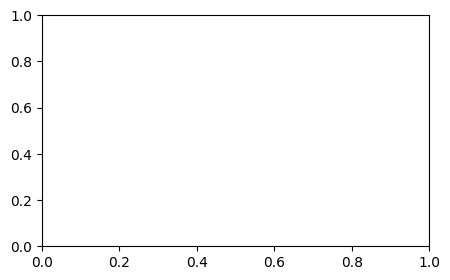

In [8]:
t = np.linspace(0,delta_t*(T+1), T+1)

plt.figure(figsize=(5,3))
for drone in drone_list:
    plt.plot(t,np.array(drone.xcorList), color="gray")
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel("time", fontsize=8)

plt.figure(figsize=(5,3))
for drone in drone_list:
    plt.plot(t,np.array(drone.v_xList), color="gray")
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel("time", fontsize=8)

In [9]:
#vars(drone_list[1])
print(drone_list[1].v_xList)

[0, 0.001947278121399055, 0.0050721195895447975, 0.00952529777656602, 0.015455707310619047, 0.023000877456438366, 0.032276030861226476, 0.043362993316752155, 0.05630069429928395, 0.07107904071772056, 0.08763746893363172, 0.10586856470646645, 0.12562608008708936, 0.14673583931949696, 0.1690076697621805, 0.19224665229353946, 0.2162624954203147, 0.24087645888939627, 0.26592578954252527, 0.2912659870549594, 0.31677138353038176, 0.34233454388839574, 0.3678649323209468, 0.39328719322049144, 0.4185392952428324, 0.4435707012277354, 0.46834066029776106, 0.49281667113870714, 0.5169731340419359, 0.5407901898849897, 0.5642527332997171, 0.5873495819894369, 0.6100727824141347, 0.6324170324077085, 0.6543792027573556, 0.6759579417499747, 0.6971533488048145, 0.7179667053568147, 0.7384002530244533, 0.758457010745018, 0.7781406239809758, 0.7974552403051828, 0.8164054066812632, 0.8349959845932863, 0.8532320798706431, 0.871118984622797, 0.8886621291648612, 0.9058670421964776, 0.9227393178082907, 0.93928458